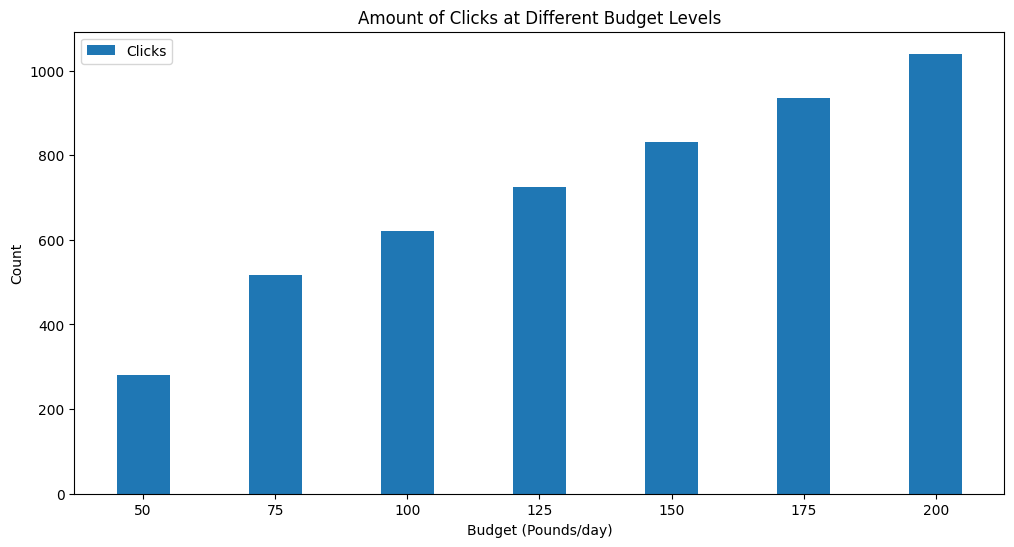

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated data from the provided image
data = {
    'Budget': [50, 75, 100, 125, 150, 175, 200],
    'Clicks': [280, 517, 621, 726, 831, 935, 1040],
    'Increase_Clicks_%': [0,85, 20, 17, 14, 13, 11],
    'Conversion': [9, 13, 14, 16, 18, 20, 21],
    'Increase_Conversion_%': [0,44, 14, 12, 11, 10, 9],
    'Conv_rate_%': [3.1, 2.4, 2.3, 2.2, 2.1, 2.1, 2.0],
    'Cost_per_conversion': [39.9, 41.5, 48.7, 54.4, 59.0, 62.8, 65.9]
}
df = pd.DataFrame(data)

# 1. Visualization: Amount of clicks at different budget levels (bar chart)
plt.figure(figsize=(12, 6))
plt.bar(df['Budget'], df['Clicks'], width=10, label='Clicks')
plt.xlabel('Budget (Pounds/day)')
plt.ylabel('Count')
plt.title('Amount of Clicks at Different Budget Levels')
plt.xticks(df['Budget'])
plt.legend()
plt.show()




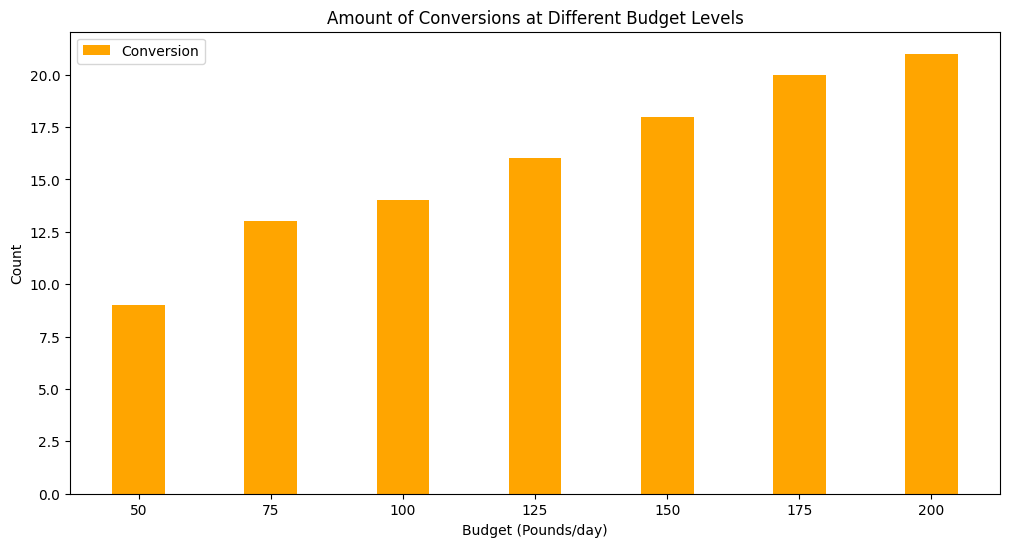

In [2]:
# 2. Visualization: Amount of conversions at different budget levels (bar chart)
plt.figure(figsize=(12, 6))
plt.bar(df['Budget'], df['Conversion'], width=10, label='Conversion', color='orange')
plt.xlabel('Budget (Pounds/day)')
plt.ylabel('Count')
plt.title('Amount of Conversions at Different Budget Levels')
plt.xticks(df['Budget'])
plt.legend()
plt.show()



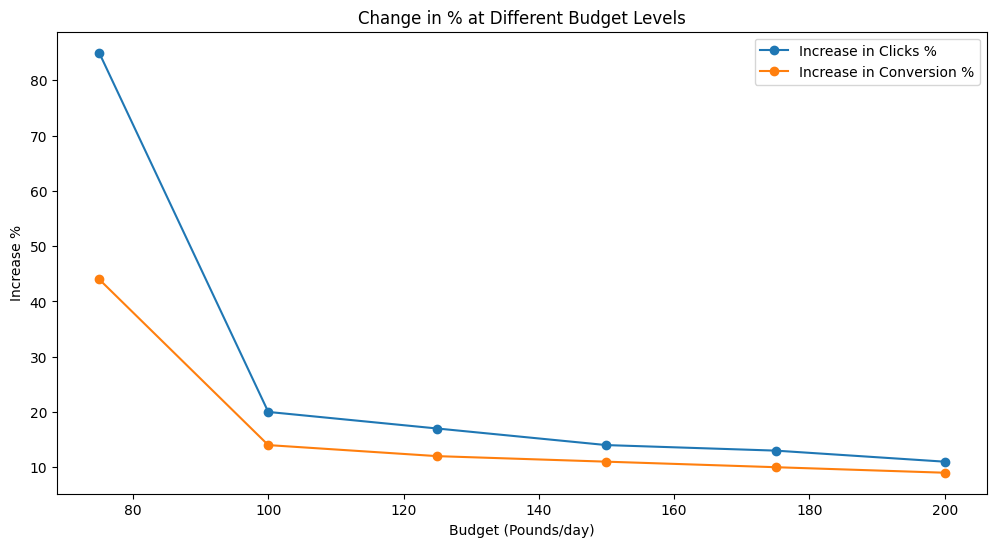

In [3]:
# Filter out rows where 'Increase_Clicks_%' or 'Increase_Conversion_%' are zero
df_filtered = df[(df['Increase_Clicks_%'] != 0) & (df['Increase_Conversion_%'] != 0)]
# Visualization: Change in % at different budget levels (line chart)
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Budget'], df_filtered['Increase_Clicks_%'], marker='o', label='Increase in Clicks %')
plt.plot(df_filtered['Budget'], df_filtered['Increase_Conversion_%'], marker='o', label='Increase in Conversion %')
plt.xlabel('Budget (Pounds/day)')
plt.ylabel('Increase %')
plt.title('Change in % at Different Budget Levels')
plt.legend()
plt.show()


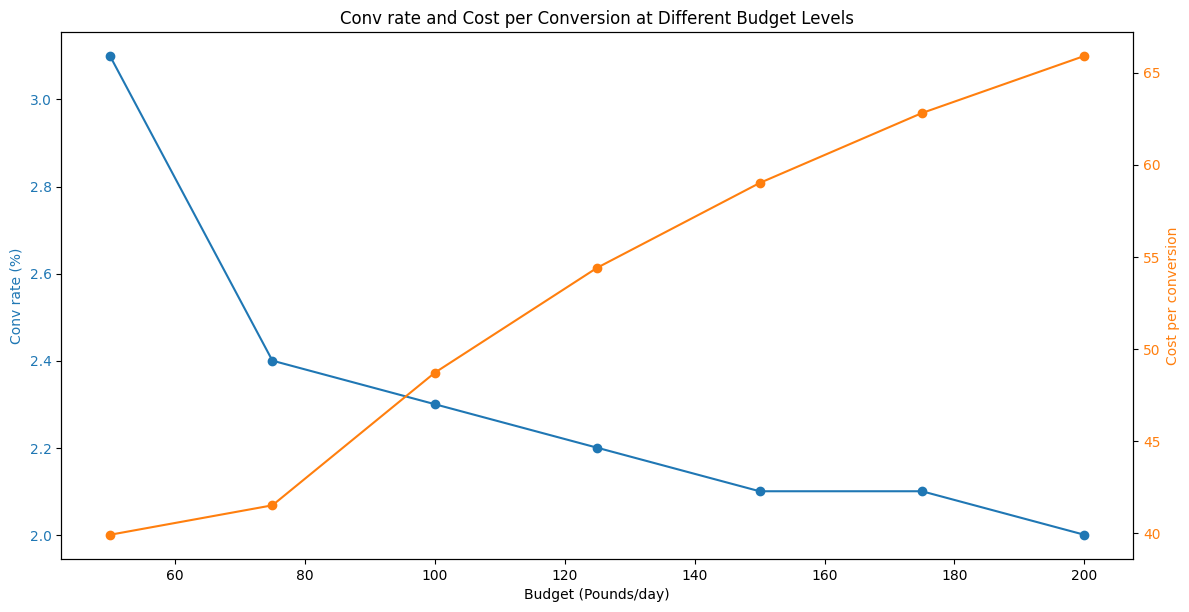

In [4]:

# 3. Visualization: Conv/rate and cost per conversion (dual axis line chart)
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Budget (Pounds/day)')
ax1.set_ylabel('Conv rate (%)', color=color)
ax1.plot(df['Budget'], df['Conv_rate_%'], marker='o', color=color, label='Conv rate %')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Cost per conversion', color=color)
ax2.plot(df['Budget'], df['Cost_per_conversion'], marker='o', color=color, label='Cost per conversion')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Conv rate and Cost per Conversion at Different Budget Levels')
plt.show()

Cost Equilibrium Point

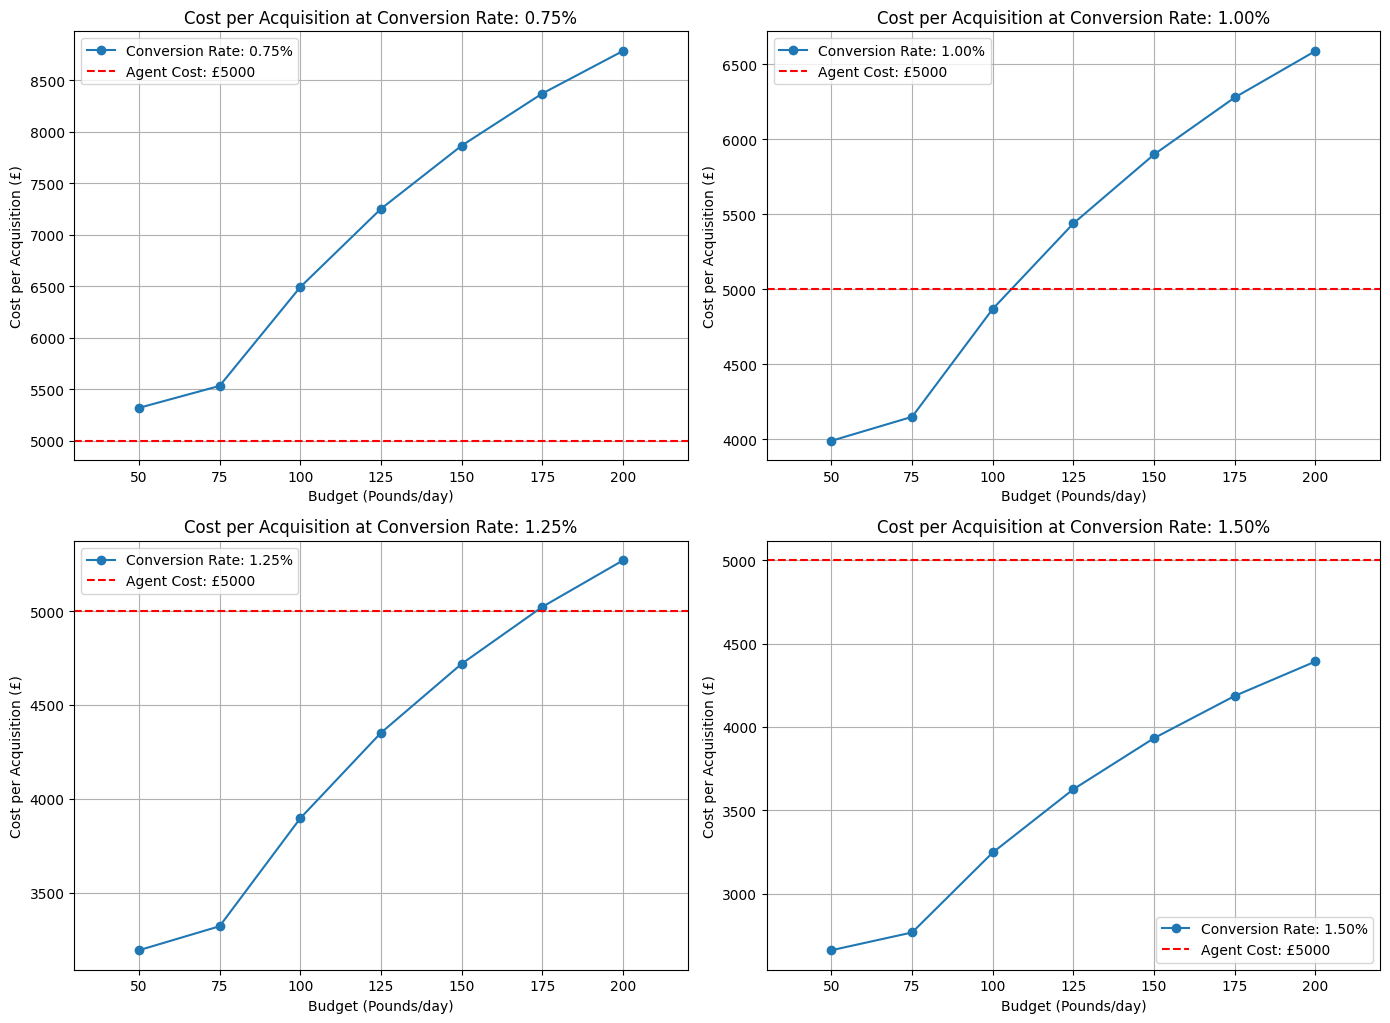

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define budget levels and corresponding cost per conversion
budgets = np.array([50, 75, 100, 125, 150, 175, 200])
cost_per_conversion = np.array([39.9, 41.5, 48.7, 54.4, 59.0, 62.8, 65.9])

# Updated conversion rates to check
conversion_rates = [ 0.0075, 0.01, 0.0125, 0.015]  # Rates: 0.5%, 0.75%, 1%, 1.25%, and 1.5%

# Create a figure and axis for each conversion rate
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 15))  # Updated for five plots
axes = axes.flatten()  # Flatten to handle the subplots easily

for ax, rate in zip(axes, conversion_rates):
    # Calculate cost per acquisition at each budget level for the current conversion rate
    cost_per_acquisition = cost_per_conversion / rate

    # Plotting
    ax.plot(budgets, cost_per_acquisition, marker='o', label=f'Conversion Rate: {rate*100:.2f}%')
    ax.axhline(y=5000, color='red', linestyle='--', label='Agent Cost: £5000')  # Benchmark line
    ax.set_title(f'Cost per Acquisition at Conversion Rate: {rate*100:.2f}%')
    ax.set_xlabel('Budget (Pounds/day)')
    ax.set_ylabel('Cost per Acquisition (£)')
    ax.set_xlim(30, 220)  # Ensure x-axis starts at 50
    ax.legend()
    ax.grid(True)

# Handle the unused subplot (if any)
for i in range(len(conversion_rates), len(axes)):
    fig.delaxes(axes[i])  # Remove unused axes

plt.tight_layout()
plt.show()


